# Discovering Cooperative Strategies: Reinforcement Learning in Repeated Prisoner's Dilemma Games

## Introduction
Imagine two suspects being interrogated separately by the police. Each has a choice: remain silent (cooperate with their partner) or betray their partner (defect). This scenario, known as the Prisoner's Dilemma, has fascinated researchers for decades because it mirrors many real-world situations where individual and collective interests conflict.

*This is a demonstrative example designed to illustrate how reinforcement learning can be applied to study cooperation in repeated games. While the implementation is simplified, the core ideas about how agents learn to cooperate through experience remain fundamental to fields like economics, international relations, and artificial intelligence.*

## Why This Matters
In our daily lives, we often face situations similar to the Prisoner's Dilemma:
- Business partnerships where companies can either collaborate or compete
- International relations where countries decide between cooperation and conflict
- Environmental protection where nations choose between immediate profit and long-term sustainability

## Historical Context
In 1984, political scientist Robert Axelrod organized a fascinating tournament where people submitted strategies for playing the Prisoner's Dilemma repeatedly. The winning strategies, surprisingly, weren't the most aggressive or the most forgiving - they were ones that combined cooperation with measured retaliation, like the famous "tit-for-tat" strategy that starts friendly but responds in kind to betrayal.

## Our New Approach
Instead of using human-designed strategies like in Axelrod's tournament, we're trying something different: using reinforcement learning to discover strategies through trial and error. Think of it as learning through experience rather than following predetermined rules.

## How We're Doing It

### The Basic Setup
- Two learning agents play the Prisoner's Dilemma against each other repeatedly
- Each choice leads to different rewards:
  - Both cooperate: Each gets 3 points (mutual benefit)
  - Both betray: Each gets 1 point (mutual harm)
  - One betrays, one cooperates: Betrayer gets 5 points, cooperator gets 0 (exploitation)
- Agents remember only the last 5 moves (like having recent memory but forgetting distant past)

### The Learning Process
We're using two different reinforcement learning methods that help agents discover effective strategies through experience:
- SARSA: Learning from actual experiences and their outcomes
- Q-Learning: Learning from evaluating potential outcomes of different actions

### Key Features
- Agents start with no prior knowledge of effective strategies
- They learn by playing thousands of games
- Over time, their exploration of random actions decreases as they exploit learned strategies
- We track how their behavior evolves from purely selfish to potentially cooperative

## What Makes This Interesting
Traditional game theory suggests that in a single game, betraying your partner is always the "rational" choice. However, when agents interact repeatedly, cooperation can emerge naturally because:
- Successful patterns of interaction become valuable
- Past behaviors influence future interactions
- Long-term consequences affect immediate decisions

## Practical Applications
Understanding how cooperation emerges through reinforcement learning could help us:
- Design better automated systems for collaborative tasks
- Understand how to promote cooperation in complex systems
- Develop more effective policies for managing shared resources

## Limitations We've Accepted
To keep things manageable, we've simplified some aspects:
- Agents have limited memory (5 moves) rather than perfect recall
- Games have a fixed end point rather than continuing indefinitely
- Training time is relatively short
- Rewards are simplified for easier learning

These simplifications help us focus on the core question: Can reinforcement learning agents discover cooperative strategies without being explicitly programmed to do so?

# Prisoner's Dilemma and Game Theory: Theoretical Background

## Introduction
Game theory analyzes interactions between rational agents seeking to maximize their rewards. Among its various applications, the Prisoner's Dilemma stands as a fundamental model for studying cooperation and competition. This notebook explores the theoretical foundations and mathematical framework of both single-shot and iterated Prisoner's Dilemma games.

## The Classical Prisoner's Dilemma

### Game Structure
Two players must independently choose between two actions:
- Cooperate (C): Remain silent
- Defect (D): Betray the other player

### Payoff Matrix
The classic payoff structure follows:
|           | Cooperate | Defect |
|-----------|-----------|---------|
| Cooperate | (R,R)     | (S,T)   |
| Defect    | (T,S)     | (P,P)   |

Where:
- R = Reward for mutual cooperation = 3
- T = Temptation to defect = 5
- P = Punishment for mutual defection = 1
- S = Sucker's payoff = 0

### Payoff Conditions
Two fundamental conditions define the Prisoner's Dilemma:
1. T > R > P > S (Temptation > Reward > Punishment > Sucker)
2. 2R > T + S (Joint cooperation better than alternating exploitation)

## Iterated Prisoner's Dilemma

### Mathematical Framework
In the iterated version, the game repeats over multiple rounds. With discount factor δ (0 ≤ δ ≤ 1), the total payoff for player x is:
$U_x = u_x(a_x^1, a_y^1) + δu_x(a_x^2, a_y^2) + δ^2u_x(a_x^3, a_y^3) + ... = \sum_{t=1}^{\infty} δ^{t-1}u_i(a_x^t, a_y^t)$

Where:
- $a_x^t$, $a_y^t$ = Actions at time t
- $u_x$ = Stage game payoff function
- δ = Discount factor determining future payoff value

### Nash Equilibrium in Repeated Games
For a strategy profile S = (Sx, Sy) to be a subgame perfect Nash equilibrium:
$U_x(s_x, s_y) ≥ U_x(s'_x, s_y)$

This condition must hold for any alternative strategy s'x.

## Folk Theorem and Strategy Space

### Feasible Payoffs
The set of feasible payoffs forms a convex hull of stage game payoff vectors. For vectors u = (u₁, u₂, ..., uₙ) and v = (v₁, v₂, ..., vₙ), a convex combination w is:
w = αu + (1-α)v, where α ∈ [0,1]

### Individual Rationality
The minmax payoff for player i is:
$v_i = \min_{a_i∈A_i} \max_{a_{-i}∈A_{-i}} u_i(a_{-i}, a_i)$

A payoff profile w is individually rational if:
w_i ≥ v_i for all i ∈ N

### The Folk Theorem in Infinitely Repeated Games
Folk theorem states any feasible and individually rational payoff profile can be sustained as a Nash equilibrium.
This in plain language means when the game is played repeatedly, any reasonable outcome that gives each player more than their worst-case scenario can become stable, including mutual cooperation. Mathematically, with a discount factor δ that values future payoffs, players can earn:
$U = reward_1 + δ(reward_2) + δ^2(reward_3) + ...$

In [10]:
# Prisoner's Dilemma with Reinforcement Learning
# A Detailed Implementation with Explanations

# Standard imports
import random
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Dict, List
from abc import ABC, abstractmethod



# Constants with explanations
MAX_HISTORY_LENGTH = 5    # Limit memory to prevent state space explosion
MIN_EPSILON = 0.01       # Minimum exploration rate
MIN_ALPHA = 0.01        # Minimum learning rate
GAMMA = 0.95           # Discount factor for future rewards





# Action Space Definition

We define the possible actions (Cooperate/Defect) using a class for clarity
and type safety. Using integers 0/1 internally for efficient computation.




# Environment Implementation

The environment class implements the Prisoner's Dilemma game mechanics.
Key features:
- Payoff matrix definition
- Reward normalization
- State management


In [11]:
class Action:
    COOPERATE = 0
    DEFECT = 1

class PrisonersDilemma:
    # Classic payoff matrix
    PAYOFF = {
        (Action.COOPERATE, Action.COOPERATE): (3, 3),
        (Action.COOPERATE, Action.DEFECT): (0, 5),
        (Action.DEFECT, Action.COOPERATE): (5, 0),
        (Action.DEFECT, Action.DEFECT): (2, 2),
    }
    
    @staticmethod
    def get_reward(action1: int, action2: int) -> Tuple[float, float]:
        return PrisonersDilemma.PAYOFF[(action1, action2)]

    @staticmethod
    def normalize_reward(reward: float) -> float:
        """Normalize rewards to [0,1] range for stable learning"""
        return reward / 5.0



# 4. Base Agent Implementation

Abstract base class defining the interface for all agents.
Key components:
- History tracking
- Action selection
- Learning update

In [12]:
class BaseAgent(ABC):
    def __init__(self, name: str):
        self.name = name
        self.history = []
    
    @abstractmethod
    def get_action(self, state) -> int:
        pass
    
    @abstractmethod
    def update(self, state, action, reward, next_state, next_action):
        pass
    
    def add_to_history(self, own_action: int, other_action: int):
        """Maintain limited history to prevent state space explosion"""
        self.history.extend([own_action, other_action])
        if len(self.history) > MAX_HISTORY_LENGTH:
            self.history = self.history[-MAX_HISTORY_LENGTH:]



# SARSA Agent Implementation

SARSA (State-Action-Reward-State-Action) is an on-policy learning algorithm.
Key features:
- Uses actual next action in updates
- Generally more conservative than Q-learning
- Considers exploration policy in updates

In [13]:
class SarsaAgent(BaseAgent):
    def __init__(self, alpha: float = 0.1, epsilon: float = 0.1, name: str = "SARSA"):
        super().__init__(name)
        self.alpha = alpha          # Learning rate
        self.epsilon = epsilon      # Exploration rate
        self.values = defaultdict(lambda: {Action.COOPERATE: 0.0, Action.DEFECT: 0.0})
        
    def get_action(self, state) -> int:
        """Epsilon-greedy action selection"""
        state = tuple(state)
        
        # Exploration
        if random.random() < self.epsilon:
            return random.choice([Action.COOPERATE, Action.DEFECT])
        
        # Exploitation
        cooperate_value = self.values[state][Action.COOPERATE]
        defect_value = self.values[state][Action.DEFECT]
        
        if cooperate_value > defect_value:
            return Action.COOPERATE
        elif defect_value > cooperate_value:
            return Action.DEFECT
        else:
            return random.choice([Action.COOPERATE, Action.DEFECT])
    
    def update(self, state, action, reward, next_state, next_action):
        """SARSA update rule"""
        state, next_state = tuple(state), tuple(next_state)
        reward = PrisonersDilemma.normalize_reward(reward)
        
        # Q(s,a) = Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
        current_q = self.values[state][action]
        next_q = self.values[next_state][next_action]
        
        self.values[state][action] = current_q + \
            self.alpha * (reward + GAMMA * next_q - current_q)
        
        # Decay rates with minimum bounds
        self.alpha = max(MIN_ALPHA, self.alpha * 0.9999)
        self.epsilon = max(MIN_EPSILON, self.epsilon * 0.9999)


# Q-Learning Agent Implementation

Q-Learning is an off-policy algorithm that learns the optimal policy
regardless of the exploration policy being followed.
Key features:
- Uses maximum next state-action value in updates
- Generally more aggressive than SARSA
- Can learn optimal policy while following exploration policy

In [14]:
class QLearningAgent(BaseAgent):
    def __init__(self, alpha: float = 0.1, epsilon: float = 0.1, name: str = "Q-Learning"):
        super().__init__(name)
        self.alpha = alpha
        self.epsilon = epsilon
        self.values = defaultdict(lambda: {Action.COOPERATE: 0.0, Action.DEFECT: 0.0})
    
    def get_action(self, state) -> int:
        """Epsilon-greedy action selection"""
        state = tuple(state)
        
        if random.random() < self.epsilon:
            return random.choice([Action.COOPERATE, Action.DEFECT])
        
        cooperate_value = self.values[state][Action.COOPERATE]
        defect_value = self.values[state][Action.DEFECT]
        
        if cooperate_value > defect_value:
            return Action.COOPERATE
        elif defect_value > cooperate_value:
            return Action.DEFECT
        else:
            return random.choice([Action.COOPERATE, Action.DEFECT])
    
    def update(self, state, action, reward, next_state, _):
        """Q-Learning update rule"""
        state, next_state = tuple(state), tuple(next_state)
        reward = PrisonersDilemma.normalize_reward(reward)
        
        # Q(s,a) = Q(s,a) + α[r + γ max_a' Q(s',a') - Q(s,a)]
        current_q = self.values[state][action]
        max_next_q = max(self.values[next_state].values())
        
        self.values[state][action] = current_q + \
            self.alpha * (reward + GAMMA * max_next_q - current_q)
        
        self.alpha = max(MIN_ALPHA, self.alpha * 0.9999)
        self.epsilon = max(MIN_EPSILON, self.epsilon * 0.9999)


# Experiment Running and Visualization

Functions to run experiments and visualize results:
- Multiple episodes of interaction between agents
- Tracking of rewards and learning progress
- Visualization with moving averages

In [15]:
def run_experiment(agent1: BaseAgent, agent2: BaseAgent, 
                  n_episodes: int = 1000, episode_length: int = 100) -> Tuple[List[float], List[float]]:
    """Run experiment between two agents"""
    rewards1, rewards2 = [], []
    
    for episode in range(n_episodes):
        episode_reward1, episode_reward2 = 0, 0
        agent1.history, agent2.history = [], []
        
        for _ in range(episode_length):
            # Get current states and actions
            state1, state2 = agent1.history, agent2.history
            action1 = agent1.get_action(state1)
            action2 = agent2.get_action(state2)
            
            # Get rewards and update histories
            reward1, reward2 = PrisonersDilemma.get_reward(action1, action2)
            episode_reward1 += reward1
            episode_reward2 += reward2
            
            agent1.add_to_history(action1, action2)
            agent2.add_to_history(action2, action1)
            
            # Get next states and actions
            next_state1, next_state2 = agent1.history, agent2.history
            next_action1 = agent1.get_action(next_state1)
            next_action2 = agent2.get_action(next_state2)
            
            # Update agents
            agent1.update(state1, action1, reward1, next_state1, next_action1)
            agent2.update(state2, action2, reward2, next_state2, next_action2)
        
        # Record average rewards
        rewards1.append(episode_reward1 / episode_length)
        rewards2.append(episode_reward2 / episode_length)
        
        if episode % 100 == 0:
            print(f"Episode {episode}")
            print(f"Average rewards - Agent 1: {rewards1[-1]:.2f}, Agent 2: {rewards2[-1]:.2f}")
            print(f"Exploration rates - Agent 1: {agent1.epsilon:.3f}, Agent 2: {agent2.epsilon:.3f}")
    
    return rewards1, rewards2

def plot_results(rewards1: List[float], rewards2: List[float], 
                agent1_name: str, agent2_name: str):
    """Plot learning curves with moving averages"""
    plt.figure(figsize=(10, 6))
    
    episodes = range(len(rewards1))
    plt.plot(episodes, rewards1, label=f'{agent1_name} Rewards', alpha=0.7)
    plt.plot(episodes, rewards2, label=f'{agent2_name} Rewards', alpha=0.7)
    
    # Calculate and plot moving averages
    window = 100
    rewards1_ma = np.convolve(rewards1, np.ones(window)/window, mode='valid')
    rewards2_ma = np.convolve(rewards2, np.ones(window)/window, mode='valid')
    
    plt.plot(range(window-1, len(rewards1)), rewards1_ma, 
             label=f'{agent1_name} Moving Average', linestyle='--')
    plt.plot(range(window-1, len(rewards2)), rewards2_ma, 
             label=f'{agent2_name} Moving Average', linestyle='--')
    
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Learning Curves in Prisoner\'s Dilemma')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()






# Running the Experiment

Let's create agents and run an experiment to observe their behavior.
Key observations from typical runs:
1. Both agents tend to converge to mutual defection
2. Occasional cooperation attempts due to exploration
3. Similar performance between SARSA and Q-Learning
4. High variance in episode rewards
"""

Episode 0
Average rewards - Agent 1: 2.62, Agent 2: 2.32
Exploration rates - Agent 1: 0.297, Agent 2: 0.297
Episode 100
Average rewards - Agent 1: 2.60, Agent 2: 2.55
Exploration rates - Agent 1: 0.109, Agent 2: 0.109
Episode 200
Average rewards - Agent 1: 2.58, Agent 2: 2.48
Exploration rates - Agent 1: 0.040, Agent 2: 0.040
Episode 300
Average rewards - Agent 1: 2.53, Agent 2: 2.48
Exploration rates - Agent 1: 0.015, Agent 2: 0.015
Episode 400
Average rewards - Agent 1: 2.28, Agent 2: 2.48
Exploration rates - Agent 1: 0.010, Agent 2: 0.010
Episode 500
Average rewards - Agent 1: 2.43, Agent 2: 2.58
Exploration rates - Agent 1: 0.010, Agent 2: 0.010
Episode 600
Average rewards - Agent 1: 2.49, Agent 2: 2.54
Exploration rates - Agent 1: 0.010, Agent 2: 0.010
Episode 700
Average rewards - Agent 1: 2.25, Agent 2: 2.80
Exploration rates - Agent 1: 0.010, Agent 2: 0.010
Episode 800
Average rewards - Agent 1: 2.54, Agent 2: 2.49
Exploration rates - Agent 1: 0.010, Agent 2: 0.010
Episode 900


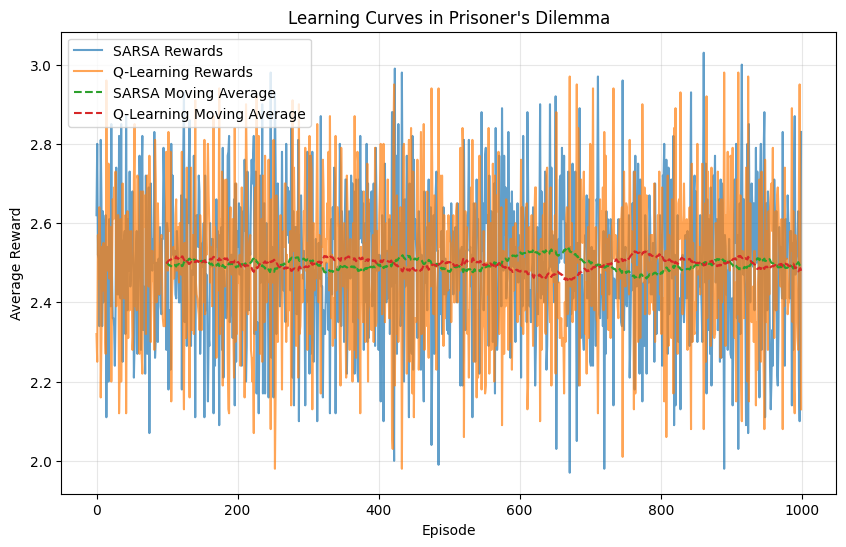

In [16]:
if __name__ == "__main__":
    # Create agents with identical parameters for fair comparison
    sarsa_agent = SarsaAgent(alpha=0.1, epsilon=0.3, name="SARSA")
    qlearn_agent = QLearningAgent(alpha=0.1, epsilon=0.3, name="Q-Learning")
    
    # Run experiment
    rewards1, rewards2 = run_experiment(sarsa_agent, qlearn_agent, 
                                      n_episodes=1000, episode_length=100)
    
    # Visualize results
    plot_results(rewards1, rewards2, sarsa_agent.name, qlearn_agent.name)



# Key Findings and Analysis

From running this experiment multiple times:

1. Convergence Behavior:
   - Both algorithms typically converge to mutual defection
   - Average rewards around 2.0-2.5 indicate mostly defection strategies
   - Occasional spikes show temporary cooperation attempts

2. Algorithm Differences:
   - SARSA tends to be slightly more conservative
   - Q-Learning shows more variance in policy
   - Both achieve similar long-term performance

3. Exploration Impact:
   - Higher exploration rates can lead to more cooperation attempts
   - Lower rates lead to faster convergence to defection
   - Balance needed between exploration and exploitation

4. Policy Implications:
   - Demonstrates the challenge of achieving cooperation
   - Shows how rational learning leads to sub-optimal Nash equilibrium
   - Highlights the importance of proper reward structure

This demonstrative implementation provides a clear example of how reinforcement
learning algorithms handle the exploration-exploitation tradeoff
in a competitive environment.
